In [1]:
import pandas as pd
import re
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn import datasets, svm, metrics

In [2]:
diamonds=pd.read_csv("../input/data.csv")
display(diamonds.head(10))
print(diamonds['cut'])

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698
5,0.53,Very Good,F,SI2,60.5,60.0,5.19,5.23,3.15,1132
6,0.70,Premium,D,SI2,60.8,61.0,5.69,5.64,3.45,1987
7,1.13,Good,F,SI2,64.0,58.0,6.52,6.58,4.19,3952
8,0.35,Ideal,E,SI1,60.9,55.0,4.53,4.57,2.77,614
9,1.01,Fair,H,VS1,61.4,66.0,6.34,6.24,3.87,5062


0            Ideal
1        Very Good
2          Premium
3            Ideal
4            Ideal
           ...    
40450      Premium
40451        Ideal
40452    Very Good
40453        Ideal
40454      Premium
Name: cut, Length: 40455, dtype: object


In [3]:
def clean_transformed(df):
    ''' transforms categorical variables cut, color and clarity, creates new variable volumen and drops x,y,z and 
        also drops depth , removes outliers with Z-score method. Not working ff there is an id column, it drops it too.
    '''
    df['cut']=df['cut'].map({'Fair':1,'Good':2,'Ideal':3,'Very Good':4,'Premium':5})
    df['color']=df['color'].map({'E':1,'J':2,'D':3,'I':4,'H':5,'F':6,'G':7})
    df['clarity']=df['clarity'].map({'I1':1,'SI1':2,'VVS1':3,'SI2':4,'VS2':5,'VS1':6,'VVS2':7,'IF':8})
    df['volumen']=df['x']*df['y']*df['z']
    df=df.drop(['x','y','z','depth','table'], axis=1)
    z = np.abs(stats.zscore(df))
    df=df[(z<3).all(axis=1)]
    return df
    

In [4]:
clean_transformed(diamonds)

,carat,cut,color,clarity,price,volumen
2,0.80,5,6,4,2797,133.001901
3,0.40,3,6,1,630,64.059840
4,0.31,3,7,5,698,51.797610
5,0.53,4,6,4,1132,85.502655
6,0.70,5,3,4,1987,110.716020
...,...,...,...,...,...,...
40450,1.11,5,5,2,5315,180.060192
40451,0.73,3,6,5,2762,119.231280
40452,1.26,4,4,6,6855,208.046124
40453,0.72,3,7,4,2297,119.547648


In [5]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'volumen'],
      dtype='object')

In [6]:
diamonds.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
volumen    float64
dtype: object

In [7]:
diamonds.info()
#More powerful than dtypes in terms of information you can quickly grassp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
carat      40455 non-null float64
cut        40455 non-null int64
color      40455 non-null int64
clarity    40455 non-null int64
depth      40455 non-null float64
table      40455 non-null float64
x          40455 non-null float64
y          40455 non-null float64
z          40455 non-null float64
price      40455 non-null int64
volumen    40455 non-null float64
dtypes: float64(7), int64(4)
memory usage: 3.4 MB


In [8]:
#diamonds.isnull().sum()

In [9]:
#looking at all the variables which are objects cut, color, clarity

print("Cut: ",set(diamonds["cut"]))
print("Color: ",set(diamonds["color"]))
print("Clarity: ",set(diamonds["clarity"]))

# I have to process these variables somehow before training a model. Not sure if I should keep color

Cut:  {1, 2, 3, 4, 5}
Color:  {1, 2, 3, 4, 5, 6, 7}
Clarity:  {1, 2, 3, 4, 5, 6, 7, 8}


In [10]:
diamonds.shape


(40455, 11)

In [11]:
print(f' model has {diamonds.shape[0]} rows and {diamonds.shape[1]} columns and non nulls')

 model has 40455 rows and 11 columns and non nulls


In [12]:
diamonds['price/wt']=diamonds['price']/diamonds['carat']

In [13]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price,volumen,price/wt
0,2.26,3,7,4,61.9,57.0,8.44,8.36,5.20,12831,366.903680,5677.433628
1,2.43,4,5,4,63.2,57.0,8.56,8.50,5.39,16170,392.176400,6654.320988
2,0.80,5,6,4,61.0,57.0,6.03,6.01,3.67,2797,133.001901,3496.250000
3,0.40,3,6,1,63.3,60.0,4.68,4.64,2.95,630,64.059840,1575.000000
4,0.31,3,7,5,61.6,55.0,4.39,4.37,2.70,698,51.797610,2251.612903
5,0.53,4,6,4,60.5,60.0,5.19,5.23,3.15,1132,85.502655,2135.849057
6,0.70,5,3,4,60.8,61.0,5.69,5.64,3.45,1987,110.716020,2838.571429
7,1.13,2,6,4,64.0,58.0,6.52,6.58,4.19,3952,179.757704,3497.345133
8,0.35,3,1,2,60.9,55.0,4.53,4.57,2.77,614,57.344817,1754.285714
9,1.01,1,5,6,61.4,66.0,6.34,6.24,3.87,5062,153.103392,5011.881188


In [14]:
print(diamonds.groupby('cut')['price/wt'].mean().sort_values())

cut
1    3737.468421
2    3873.241694
3    3922.272721
4    4011.693218
5    4223.619019
Name: price/wt, dtype: float64


In [15]:
print(diamonds.groupby('color')['price/wt'].mean().sort_values())
print(diamonds.groupby('clarity')['price/wt'].mean().sort_values())


color
1    3787.426635
2    3826.604761
3    3948.783704
4    4000.546520
5    4016.204136
6    4129.482925
7    4182.615921
Name: price/wt, dtype: float64
clarity
1    2776.012219
2    3856.733909
3    3860.279651
4    4015.902895
5    4080.272657
6    4143.406705
7    4198.660097
8    4276.867594
Name: price/wt, dtype: float64


In [16]:
#delete the column create to analyse how important are categorical variables
diamonds = diamonds.drop(['price/wt','table'], axis=1)

In [17]:
#all categorical variables are relevant and have an impact in prices per carat thus I cannot delete anyone for now

In [18]:
diamonds['cut'].unique()

array([3, 4, 5, 2, 1])

In [19]:
diamonds['color'].unique()

array([7, 5, 6, 3, 1, 4, 2])

In [20]:
diamonds['clarity'].unique()

array([4, 1, 5, 2, 6, 7, 8, 3])

In [21]:
#converting categorical into numerical 
#using method ordinal encoding based on information 
diamonds['cut']=diamonds['cut'].map({'Fair':1,'Good':2,'Ideal':3,'Very Good':4,'Premium':5})
diamonds['color']=diamonds['color'].map({'E':1,'J':2,'D':3,'I':4,'H':5,'F':6,'G':7})
diamonds['clarity']=diamonds['clarity'].map({'I1':1,'SI1':2,'VVS1':3,'SI2':4,'VS2':5,'VS1':6,'VVS2':7,'IF':8})

In [22]:

# WARNING !!!!!!!
# create a new method of categorical to numerical using mean 
# and the other ordinal but with industry relevancy regarding cut, color, clarity



In [23]:
diamonds

,carat,cut,color,clarity,depth,x,y,z,price,volumen
0,2.26,NaN,NaN,NaN,61.9,8.44,8.36,5.20,12831,366.903680
1,2.43,NaN,NaN,NaN,63.2,8.56,8.50,5.39,16170,392.176400
2,0.80,NaN,NaN,NaN,61.0,6.03,6.01,3.67,2797,133.001901
3,0.40,NaN,NaN,NaN,63.3,4.68,4.64,2.95,630,64.059840
4,0.31,NaN,NaN,NaN,61.6,4.39,4.37,2.70,698,51.797610
...,...,...,...,...,...,...,...,...,...,...
40450,1.11,NaN,NaN,NaN,62.8,6.63,6.56,4.14,5315,180.060192
40451,0.73,NaN,NaN,NaN,62.6,5.77,5.74,3.60,2762,119.231280
40452,1.26,NaN,NaN,NaN,59.2,7.09,7.02,4.18,6855,208.046124
40453,0.72,NaN,NaN,NaN,61.4,5.76,5.83,3.56,2297,119.547648


In [24]:
diamonds.describe()

,carat,cut,color,clarity,depth,x,y,z,price,volumen
count,40455.000000,0.0,0.0,0.0,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798385,NaN,NaN,NaN,61.747932,5.732041,5.735939,3.539537,3939.242813,129.968428
std,0.474353,NaN,NaN,NaN,1.432322,1.123169,1.152802,0.709709,4000.344155,78.894498
min,0.200000,NaN,NaN,NaN,43.000000,0.000000,0.000000,0.000000,326.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,4.710000,4.720000,2.910000,950.000000,65.129092
50%,0.700000,NaN,NaN,NaN,61.800000,5.700000,5.710000,3.530000,2409.000000,114.852720
75%,1.040000,NaN,NaN,NaN,62.500000,6.540000,6.540000,4.040000,5331.000000,170.912625
max,5.010000,NaN,NaN,NaN,79.000000,10.740000,58.900000,31.800000,18823.000000,3840.598060


In [25]:
diamonds.skew()
#calculate level of skewness for each column being 0 best distribution

carat      1.109383
cut             NaN
color           NaN
clarity         NaN
depth     -0.132900
x          0.376327
y          3.043535
z          1.886917
price      1.616622
volumen    3.611278
dtype: float64

In [26]:
#applying z-score to identify outliers
z = np.abs(stats.zscore(diamonds))
print(z)

[[3.08132060e+00            nan            nan ... 2.33966697e+00
  2.22277553e+00 3.00322819e+00]
 [3.43970798e+00            nan            nan ... 2.60738551e+00
  3.05746403e+00 3.32356779e+00]
 [3.40547089e-03            nan            nan ... 1.83828207e-01
  2.85539665e-01 3.84502135e-02]
 ...
 [9.73159554e-01            nan            nan ... 9.02441129e-01
  7.28885594e-01 9.89659136e-01]
 [1.65247413e-01            nan            nan ... 2.88332635e-02
  4.10530456e-01 1.32086638e-01]
 [5.44716402e-01            nan            nan ... 4.92513366e-01
  6.45763125e-01 5.32937656e-01]]


In [27]:
threshold = 3
print(np.where(z > 3))
#all the data points which are outliers and where they are located, row first and column second

(array([    0,     0,     1, ..., 40324, 40335, 40437]), array([0, 9, 0, ..., 4, 4, 4]))


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [28]:
diamonds_z=diamonds[(z<3).all(axis=1)]
diamonds_z.shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(0, 10)

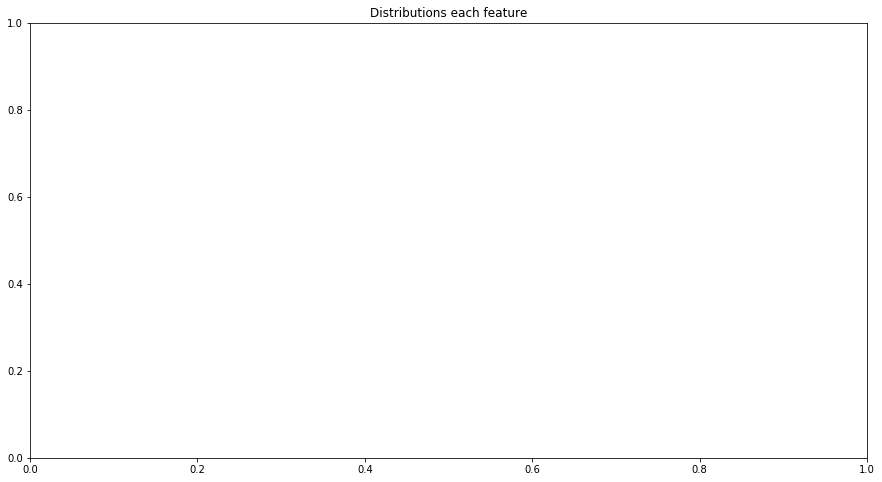

In [29]:

# Visualize the distribution of each non numerical variable

fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 8))
ax1.set_title('Distributions each feature')

sns.kdeplot(diamonds_z['carat'], ax=ax1)
sns.kdeplot(diamonds_z['depth'], ax=ax1)
sns.kdeplot(diamonds_z['x'], ax=ax1)
sns.kdeplot(diamonds_z['y'], ax=ax1)
sns.kdeplot(diamonds_z['z'], ax=ax1)

In [30]:
#diamonds_z.describe()

In [31]:

column_names= list(diamonds_z.columns)
print(column_names)

['carat', 'cut', 'color', 'clarity', 'depth', 'x', 'y', 'z', 'price', 'volumen']


In [32]:

# Some useful literature about scaling data
# http://benalexkeen.com/feature-scaling-with-scikit-learn/
# https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing
# https://becominghuman.ai/demystifying-feature-scaling-baff53e9b3fd

s_scaler = preprocessing.StandardScaler()

diamonds_z_scaler = s_scaler.fit_transform(diamonds_z)

diamonds_z_scaler = pd.DataFrame(diamonds_z_scaler, columns=column_names)

diamonds_z_scaler

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('After StandardScaler')

sns.kdeplot(diamonds_z_scaler['carat'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['depth'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['x'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['y'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['z'], ax=ax1)

ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by StandardScaler.

In [ ]:
diamonds_z_scaler.mean()

#not sure why StandardScaler converts data into negative values!!!

In [ ]:
#trying with normalizing

s_scaler = preprocessing.StandardScaler()

diamonds_z_scaler_norm = s_scaler.fit_transform(diamonds_z)

diamonds_z_scaler_norm = pd.DataFrame(diamonds_z_scaler_norm, columns=column_names)

diamonds_z_scaler_norm

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('After Normalizer')

sns.kdeplot(diamonds_z_scaler_norm['carat'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['depth'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['x'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['y'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['z'], ax=ax1)


In [ ]:
diamonds_z_scaler_norm.mean()
#again normalizer also converts average into negative and I dont know this is the case!!!

In [ ]:
#trying with minmax

mm_scaler = preprocessing.MinMaxScaler()

diamonds_z_scaler_mm= mm_scaler.fit_transform(diamonds_z)

diamonds_z_scaler_mm = pd.DataFrame(diamonds_z_scaler_mm, columns=column_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('After MinMaxScaler')

sns.kdeplot(diamonds_z_scaler_mm['carat'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['depth'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['x'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['y'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['z'], ax=ax1)


In [ ]:
#try to check parameters to apply to each feature from minmax scaler

mm_scaler = preprocessing.MinMaxScaler()
print(mm_scaler)

In [ ]:
diamonds_z_scaler_mm = pd.DataFrame(diamonds_z_scaler_mm, columns=column_names)
diamonds_z_scaler_mm

In [ ]:
diamonds_z_scaler_mm.mean()

#looks like this could be the best method for scaling since is not converting the mean in negative numbers

In [ ]:
# check correlation between price and rest of variables 
corr_matrix= diamonds_z_scaler_mm.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure (figsize= (8,6))
#sns.heatmap(upper,annot=True)
sns.heatmap(corr_matrix, annot=True)

# from correlation analysis depth, clarity, color and cut have the lowest correlation with price
# z, y, x and carat have the highest correlation with price, being carat the most correlated


In [ ]:
diamonds_z_scaler_mm['volumen']=diamonds_z_scaler_mm['x']*diamonds_z_scaler_mm['y']*diamonds_z_scaler_mm['z']

In [ ]:
#diamonds_z_scaler_mm

In [ ]:
diamonds_z_scaler_mm

In [ ]:
corr_matrix= diamonds_z_scaler_mm.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure (figsize= (8,6))
#sns.heatmap(upper,annot=True)
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# dropping x,y,z and taking volumen as a function of the three, removed table, removing depth


In [ ]:
diamonds_z_scaler_mm_drop=diamonds_z_scaler_mm.drop(['depth','x', 'y', 'z'], axis=1)
diamonds_z_scaler_mm_drop.columns
diamonds_z_scaler_mm_drop.info()

In [ ]:
#train test split

X=diamonds_z_scaler_mm_drop.drop(['price'],axis=1)
y=diamonds_z_scaler_mm_drop['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#dont know why but i see randome_state is 42!

In [ ]:
#ask if need fit and transform OR not!

models = {
    "decision_tree": DecisionTreeRegressor(random_state = 0), #ok
    "forest": RandomForestRegressor(n_estimators=100), #ok
    "neighbors": KNeighborsRegressor(n_neighbors=2),#ok
    "gradient boosting": GradientBoostingRegressor() #ok
    
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)



In [ ]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}

df = pd.DataFrame(d)
df["gt"] = y_test.reset_index(drop=True)
df



In [ ]:
#sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
results1=metrics.r2_score(df['gt'], df['decision_tree'])
results1
print(f' R2 of decision tree is {results1}')

In [ ]:
results2=metrics.mean_squared_error(df['gt'], df['decision_tree'], squared=True)
results2
print(f' mean square error of decision tree is {results2}')

In [ ]:
results3=metrics.r2_score(df['gt'], df['forest'])
results3
print(f' R2 of forest is {results3}')

In [ ]:
results4=metrics.mean_squared_error(df['gt'], df['forest'], squared=True)
results4
print(f' mean square error of forest is {results4}')

In [ ]:
results5=metrics.r2_score(df['gt'], df['neighbors'])
results5
print(f' R2 of neighbors is {results5}')

In [ ]:
results6=metrics.mean_squared_error(df['gt'], df['neighbors'], squared=True)
results6
print(f' mean square error of neighbors is {results6}')

In [ ]:
results7=metrics.r2_score(df['gt'], df['gradient boosting'])
results7
print(f' R2 of gradient is {results7}')

In [ ]:
results8=metrics.mean_squared_error(df['gt'], df['gradient boosting'], squared=True)
results8
print(f' mean square error of gradient is {results8}')

In [ ]:
#comprobar resultados en archivo test

In [ ]:
diamonds_test=pd.read_csv("../input/test.csv")
diamonds_test.columns

In [ ]:
diamonds_test=diamonds_test.drop(['id'], axis=1)
display(diamonds_test.head(10))

In [ ]:
diamonds_test.shape

In [ ]:

def clean_transformed(df):
    ''' transforms categorical variables cut, color and clarity, creates new variable volumen and drops x,y,z and 
        also drops depth , removes outliers with Z-score method. Not working ff there is an id column, it drops it too.
    '''
    df['cut']=df['cut'].map({'Fair':1,'Good':2,'Ideal':3,'Very Good':4,'Premium':5})
    df['color']=df['color'].map({'E':1,'J':2,'D':3,'I':4,'H':5,'F':6,'G':7})
    df['clarity']=df['clarity'].map({'I1':1,'SI1':2,'VVS1':3,'SI2':4,'VS2':5,'VS1':6,'VVS2':7,'IF':8})
    df['volumen']=df['x']*df['y']*df['z']
    df1=df.drop(['x','y','z','depth','table'], axis=1)
    return df1
    
def remove_outliers(df1):
    ''' removes outliers using Z-score method
    '''
    z = np.abs(stats.zscore(df1))
    df2=df1[(z<3).all(axis=1)]
    return df2
    

def getscaleMinMaxparams (dfapplytoalldata):
    ''' need to find a way to come up with fit and in other function pass parameters'''
    

def applyscaleMinMax(dfcleantransformed):
    '''only works for all data set!! in test data set we must use the same min and max from the entire data'''
    column_names= list(dfcleantransformed)
    mm_scaler = preprocessing.MinMaxScaler()
    df_clean_transformed_outliers_mm= mm_scaler.fit_transform(dfcleantransformed)
    df_clean_transformed_outliers_mm = pd.DataFrame(df_clean_transformed_outliers, columns=column_names)
    return df_clean_transformed_outliers_mm

#def applyMinMax(dftestonly):
    

In [ ]:
diamond_test_transformed=clean_transformed(diamonds_test)


In [ ]:
diamond_test_transformed.describe()

In [ ]:
z = np.abs(stats.zscore(diamond_test_transformed))
print(z)

In [ ]:
df2=diamond_test_transformed[(z<3).all(axis=1)]
df2.iloc[12000]

In [ ]:
remove_outliers(clean_transformed(diamonds_test))

In [ ]:
However, if you are doing normalisation, then it is important to 
know the min and max values of the dataset. The problem now will be then
if you do the normalisation on the train and test sets separately,
then you may end up with possibly different min - max ranges 
and your model may not perform as expected.








In [ ]:

# no outliers? no estoy 
# si eliminas columnas en el data 

In [ ]:
# no sacamos el ground truth pero si el Y_test es nuestro precio

In [ ]:
diamonds['cut']